In [1]:
# Importing packages
from matplotlib import pyplot as plt
import numpy as np
import random

In [2]:
# Some functions to plot our points and draw the lines
def plot_points(features, labels):
    X = np.array(features)
    y = np.array(labels)
    plt.scatter(X, y)
    plt.xlabel('number of rooms')
    plt.ylabel('prices')
def draw_line(slope, y_intercept, color='grey', linewidth=0.7, starting=0,ending=4):     #G
    x = np.linspace(0, 8, 1000)
    plt.plot(x, y_intercept + slope*x, linestyle='-', color=color, linewidth=linewidth)

In [3]:
import pandas as pd
features = pd.Series([1,2,3,5,6,7])
labels = pd.Series([155, 197, 244, 356,407,448])
pd.concat([features, labels], axis=1)

,0,1
0,1,155
1,2,197
2,3,244
3,5,356
4,6,407
5,7,448


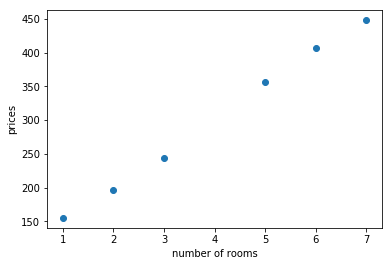

In [4]:
plot_points(features, labels)

In [5]:
def simple_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    predicted_price = base_price + price_per_room*num_rooms
    if price > predicted_price and num_rooms > 0:
        price_per_room += learning_rate
        base_price += learning_rate
    if price > predicted_price and num_rooms < 0:
        price_per_room -= learning_rate
        base_price += learning_rate
    if price < predicted_price and num_rooms > 0:
        price_per_room -= learning_rate
        base_price -= learning_rate
    if price < predicted_price and num_rooms < 0:
        price_per_room -= learning_rate
        base_price += learning_rate
    return price_per_room, base_price

In [6]:
def absolute_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    predicted_price = base_price + price_per_room*num_rooms
    if price > predicted_price:
        price_per_room += learning_rate*num_rooms
        base_price += learning_rate
    else:
        price_per_room -= learning_rate*num_rooms
        base_price -= learning_rate
    return price_per_room, base_price

In [7]:
def square_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    predicted_price = base_price + price_per_room*num_rooms
    price_per_room += learning_rate*num_rooms*(price-predicted_price)
    base_price += learning_rate*(price-predicted_price)
    return price_per_room, base_price

('Price per room:', 51.07296115119787)
('Base price:', 99.47510567502614)


(51.07296115119787, 99.47510567502614)

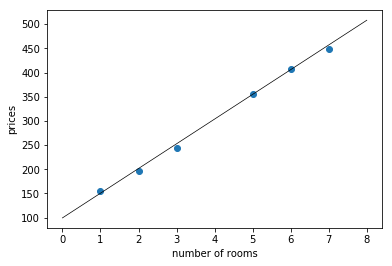

In [8]:
import random as rd
random.seed(0)
def linear_regression(features, labels, learning_rate=0.01, epochs = 1000):
    price_per_room = random.random()
    base_price = random.random()
    for i in range(epochs):
        # Uncomment any of the following lines to plot 
        #if i == 1:
        #if i <= 10:
        #if i <= 50:
        #if i > 50:
        #if i > 50 and i % (epochs/20) == 0: # only printing 1000 lines
        #    draw_line(price_per_room, base_price)
        i = random.randint(0, len(features)-1)
        num_rooms = features[i]
        price = labels[i]
#        price_per_room, base_price = simple_trick(base_price,
#        price_per_room, base_price = absolute_trick(base_price,
        price_per_room, base_price = square_trick(base_price,
                                                  price_per_room,
                                                  num_rooms,
                                                  price,
                                                  learning_rate=learning_rate)
    draw_line(price_per_room, base_price, 'black')
    plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    return price_per_room, base_price
linear_regression(features, labels, learning_rate = 0.01, epochs = 10000)

# Error function

In [29]:
def rmse(labels, predictions):
    n = len(labels)
    differences = np.subtract(labels, predictions)
    return np.sqrt(1.0/n * (np.dot(differences, differences)))

# Regularization

('Price per room:', 50.19334701136878)
('Base price:', 99.5788222694297)


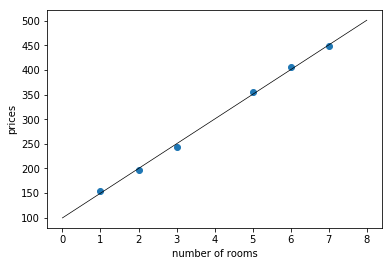

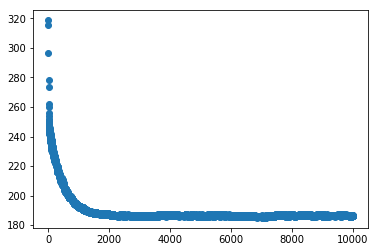

('Price per room:', 50.18096922580811)
('Base price:', 100.16167862703433)


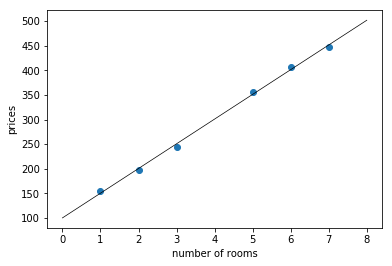

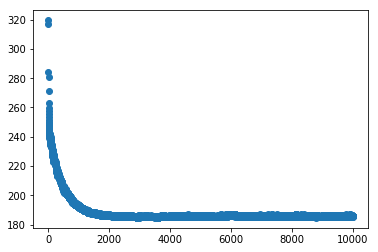

('Price per room:', 41.281028859520326)
('Base price:', 134.29479910363534)


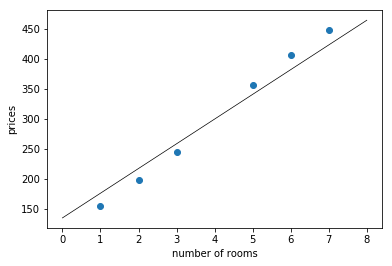

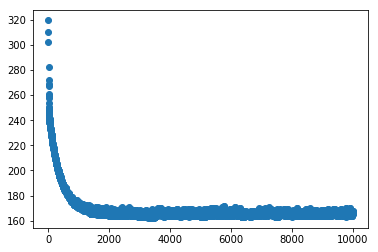

(41.281028859520326, 134.29479910363534)

In [30]:
def linear_regression(features, labels, learning_rate=0.01, epochs = 1000, l1_reg = 0, l2_reg = 0):
    price_per_room = random.random()
    base_price = random.random()
    errors = []
    for i in range(epochs):
        predictions = features[0]*price_per_room+base_price
        errors.append(rmse(labels, predictions))
        # Uncomment any of the following lines to plot 
        #if i == 1:
        #if i <= 10:
        #if i <= 50:
        #if i > 50:
        #if i > 50 and i % (epochs/20) == 0: # only printing 1000 lines
        #    draw_line(price_per_room, base_price)
        i = random.randint(0, len(features)-1)
        num_rooms = features[i]
        price = labels[i]
#        price_per_room, base_price = simple_trick(base_price,
#        price_per_room, base_price = absolute_trick(base_price,
        price_per_room, base_price = square_trick(base_price,
                                                  price_per_room,
                                                  num_rooms,
                                                  price,
                                                  learning_rate=learning_rate)
        price_per_room = (1-l2_reg)*price_per_room
        price_per_room -= l1_reg*price_per_room/(np.abs(price_per_room))
    draw_line(price_per_room, base_price, 'black')
    plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    plt.show()
    plt.scatter(range(len(errors)), errors)
    plt.show()
    return price_per_room, base_price
linear_regression(features, labels, learning_rate = 0.01, epochs = 10000)
linear_regression(features, labels, learning_rate = 0.01, epochs = 10000, l1_reg=0.01)
linear_regression(features, labels, learning_rate = 0.01, epochs = 10000, l2_reg=0.01)

# Trying higher dimensional solutions

In [108]:
import pandas as pd
features = pd.DataFrame({'num_rooms': [1,2,3,4,5,6,7,8,9,10]})
labels = pd.DataFrame({'price': [60,125,170,200,240,260,290,300,310,315]})
pd.concat([features, labels], axis=1)

,num_rooms,price
0,1,60
1,2,125
2,3,170
3,4,200
4,5,240
5,6,260
6,7,290
7,8,300
8,9,310
9,10,315


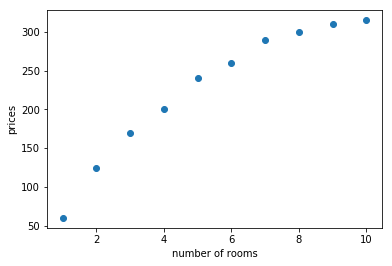

In [109]:
#labels = features.apply(lambda x:-3*x**2+60*x+10)
plot_points(features, labels)

In [111]:
features['num_rooms_2'] = features['num_rooms'].apply(lambda x: x**2)
features

,num_rooms,num_rooms_2
0,1,1
1,2,4
2,3,9
3,4,16
4,5,25
5,6,36
6,7,49
7,8,64
8,9,81
9,10,100
